# <font color="blue"> İf your data is bad, Your machine learning tools are useless
* <b>Veri iyi,temizlenmiş,anlamlı değilse; genel istatistiklerin de, makine öğrenmesi algoritmalarının da tutarlı ve işe yarar olması beklenemez.</b>

### Gürültülü Veri Nedir?
* Veri Kaynağına Bağlı Hatalar
    * Anketler,veri tabanları, ara unsurlar
* Tutarsızlık
    * Cinsiyet = Erkek, Gebelik Durumu = 1
    * Kategori = Biberon, Fiyat: 900TL
    * Vasıta Türü = Otomobil, Motor Gücü = 25HP
* Kayıtlarda Çoklama

# <font color="orange"> Aykırı Gözlem Analizi </orange>
* Veride genel eğilimin ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir. --> Aykırı değeri barındıran gözlem birimi
* Aykırılığı ifade eden nümerik değere ise "Aykırı değer" (Outlier)
* Her zaman istenmeyen veya atılması gereken değerler değildir. Başka durumları ifade ediyor olabilirler.

* Tek değişkenli incelendiğinde aykırı olmayan değişkenler çoklu incelendiklerinde aykırı olabilirle.
    * 20 yaş ve 3 boşanma değişkenleri tek başlarına aykırı değildir. Ama birarada olduklarında aykırı değişkendir.
* Aykırı gözlemler anlamsız oldukları halde yanlılığa neden olabilirler. Normalde negatif olan istatistiksel bir eğri, pozitif yönlü anlamsız outlier'lar yüzünden pozitif yönlü hale geçebilir ve bu da büyük sorunlara neden olabilir.

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float64","int64"])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


    * Sadece sürekli/sayısal değişkenleri seçtik.

In [3]:
df_table = df.table.copy()

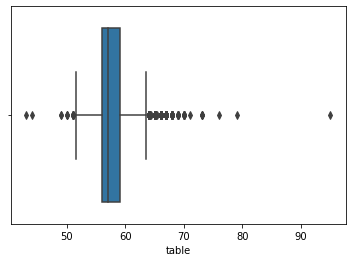

In [4]:
sns.boxplot(df_table)

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [6]:
(df_table < (alt_sinir)) | (df_table > (ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [7]:
aykirilar = df_table[df_table < (alt_sinir)]
aykirilar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

## <font color="orange"> Aykırı Değer Probleminin Çözülmesi

### 1. Aykırı Değerleri Silmek

In [8]:
import pandas as pd

In [9]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [10]:
type(df_table)

pandas.core.series.Series

In [11]:
df_table = pd.DataFrame(df_table)
type(df_table)

pandas.core.frame.DataFrame

* <u><font color="red"> Bu aykırı değer işlemlerinde daima veri tipi DataFrame olmalı </font> </u>

In [12]:
df_table.shape

(53940, 1)

In [13]:
temiz_df_table = df_table[~((df_table<(alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]

In [14]:
temiz_df_table.shape

(53335, 1)

    * Outlier değerler kaldırılmış oldu.

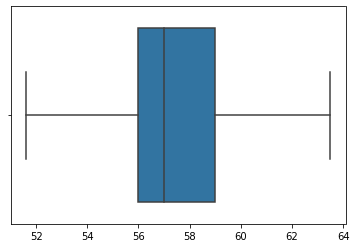

In [15]:
sns.boxplot(temiz_df_table)

### 2. Aykırı Değerleri Ortalama ile Doldurmak

In [16]:
df_table = df.table.copy()
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

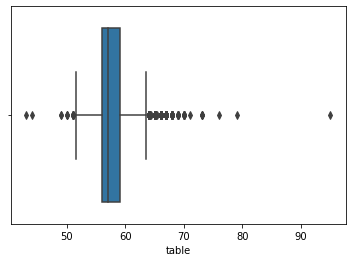

In [17]:
sns.boxplot(df_table)

In [18]:
aykiri_tf = (df_table < (alt_sinir)) |(df_table > (ust_sinir))
aykiri_tf

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [20]:
df_table = pd.DataFrame(df_table)

In [21]:
df_table[aykiri_tf]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [22]:
df_table[aykiri_tf] = df.table.mean()

In [23]:
df_table[aykiri_tf]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


In [24]:
df_table.describe()

,table
count,53940.000000
mean,57.374344
std,2.062702
min,51.600000
25%,56.000000
50%,57.000000
75%,59.000000
max,63.500000


### 3. Aykırı Değerleri Baskılama Yöntemi ile Doldurmak
* Alt sınır ve üst sınıt için ayrı ayrı baskılama yapılması gerekmektedir.

In [134]:
df_table = df.table.copy()
df_table.head()

AttributeError: 'DataFrame' object has no attribute 'table'

In [135]:
df_altsinir = df_table < (alt_sinir)

In [136]:
df_table[df_altsinir] = alt_sinir
df_table[df_altsinir]

Series([], Name: table, dtype: float64)

In [137]:
df_ustsinir = df_table > (ust_sinir)

In [138]:
df_table[df_ustsinir] = ust_sinir
df_table[df_ustsinir]

Series([], Name: table, dtype: float64)

## <font color="orange"> Çok Değişkenli Aykırı Gözlem

### Local Outlier Factor (LOF) Teorisi
* Dışardaki bir noktanın yoğunluğu diğer noktaların yoğunluğu ile karşılaştırılır ve buna göre kararlar alınır.
* Noktalar ne kadar bir araya toplanmışsa orada yoğunluk o kadar fazladır.
    * Eğer bir noktanın yoğunluğu az ise, çevresinde o kadar az nokta(değer) var demektir, böylece onun bir Aykırı Değer olduğunu düşünebiliriz.

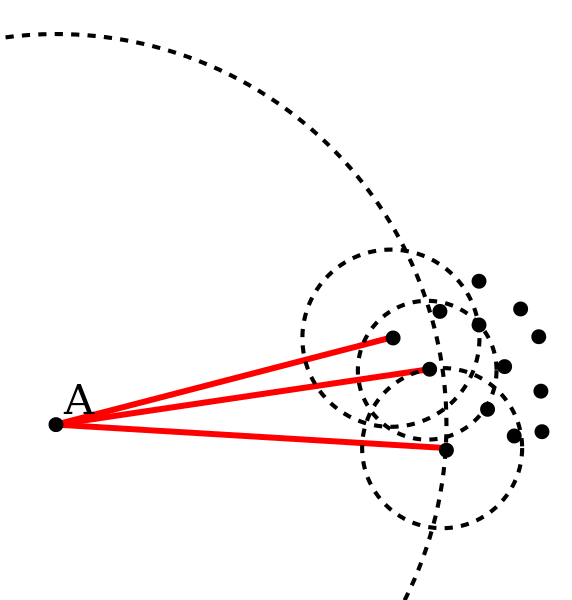

In [30]:
from IPython.display import Image
Image(filename =  "lof_intuition.png" , width=400, height=400)

* A'nın ona en yakın 3 komşusuna baktık. 3 komşusunun çevre yoğunluğu A'dan fazla ve A'da onlara daha uzak old. için, A bir outlier'dir.
    * Yoğunluk olarak çemberin büyüklüğü ile yoğunluk Ters Orantılıdır.

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [32]:
np.random.seed(42) # Bu sayede random sayıların bir başlangıç/tohum değeri atanır ve bu sayılara erişim/kullanım sağlanmış olur.
# seed sayesinde her seferinde ve her bilgisayarda aynı sayılar ürtilir.

x_inliers = np.random.normal(70,3,(100,2)) # ortalama 70, std = 3, boyut sayısı=2

x_inliers = np.r_[x_inliers+10,x_inliers-10] # r_ sayesinde index sorununa takılmadan hızlı veri üretimi sağlandı.

print(x_inliers.shape)
print(x_inliers[:3,:2])


(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [33]:
x_outliers = np.random.uniform(low=15, high=130, size = (20,2))

In [34]:
print(x_outliers)

[[115.89790327 100.18839104]
 [ 95.15681021  95.78566966]
 [ 56.34148239  48.76306209]
 [108.07653288 108.16304039]
 [114.71331664 120.02266354]
 [ 73.80437587  72.67437389]
 [106.80394558  89.74585204]
 [ 95.72619088 106.51615699]
 [117.35061431  53.86944304]
 [ 58.19203955  25.80792308]
 [ 81.50221621  19.13336149]
 [ 68.54377209  77.40413299]
 [ 47.95224399  82.94582497]
 [ 18.50752874  19.29504171]
 [109.59906448  56.42192376]
 [ 29.61195895  75.05797491]
 [103.54925861  39.81941816]
 [ 86.63240472  24.81495847]
 [ 20.94339793  76.10578263]
 [ 77.17303899  88.30443867]]


In [35]:
X = np.r_[x_inliers,x_outliers]

In [36]:
X[:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [37]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [38]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [39]:
X_score = LOF.negative_outlier_factor_

In [40]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [41]:
X_score.mean()

-1.6850227435158005

In [42]:
X_score.std()

2.140119050235338

In [43]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

<function matplotlib.pyplot.show(*args, **kw)>

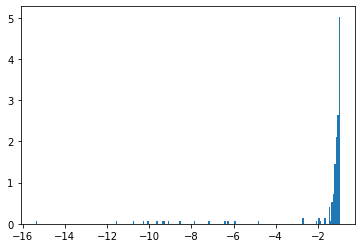

In [44]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

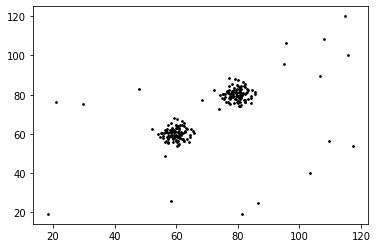

In [45]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [46]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

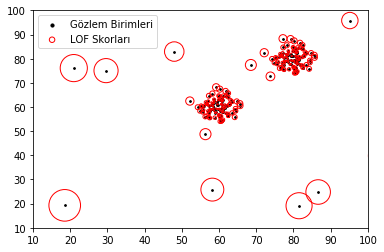

In [47]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [48]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [49]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [50]:
esik_deger = np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [51]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [52]:
tf_vektor = (X_score > esik_deger)

In [53]:
X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [54]:
X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [55]:
X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [56]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

### LOF Aykırı Gözlem Problemini Çözmek

In [57]:
df = X[X_score > esik_deger]

In [58]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [59]:
df_X = X.copy()

In [60]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [61]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [62]:
aykirilar = df_X[~tf_vektor]

In [63]:
aykirilar[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [64]:
aykirilar[:,:1] = np.mean(df_X[0])

In [65]:
aykirilar[:,1:2] = np.mean(df_X[1])

In [66]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [67]:
df_X[~tf_vektor] = aykirilar

In [68]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [69]:
df_X = X.copy()

In [70]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [71]:
df_X[X_score == esik_deger]

array([[58.19203955, 25.80792308]])

In [72]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [73]:
df_X[~tf_vektor]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

## <font color="orange"> Eksik Veri - Hızlı Çözüm
* NaN = na = eney şeklinde okunur. Bu nedenle dropna() tarzı ifadelerde drop na gibi bir durum vardır.
* Eksik verilerin direkt olarak veri setinden çıkarılması hem tespitlerin kalitesini hem de güvenilirliğini düşürecektir.
* <u>Örneğin: Kredi kartı var mı-Aylık kredi kartı harcaması şeklinde 2 tane değişkenimiz var ve kullanıcının aylık kredi kartı harcama kısmı NaN olarak girilmiş. Eğer biz bu kişiye veri setini anlamadan bir değer girersek ve daha sonrasında bu kişinin bir kredi kartına sahip olmadığını gözlemlersek aykırı bir veri kümesi oluşur.</u> Yani NaN her zaman eksik değer anlamına gelmez.
* Veya diyelim ki bir eksik değeri sildik. Peki ya bu değere sahip gözlemin diğer değişken değerleri bizim veri setimiz için çok değerli bilgiler içeriyorsa? Böyle bir durumda tespitimiz bu gözlemlerden de mahrum kalır.

In [74]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])



df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [75]:
df.isnull().sum() # her bir değişkendeki boş değer sayısı

V1    2
V2    3
V3    2
dtype: int64

### 1) Boş Değerleri Silmek --> drop NA

In [76]:
df.dropna(inplace=True)

In [77]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


    * Yukardaki kod ile tüm boş gözlemleri sileriz. TERCİH EDİLMEZ.

In [78]:
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### 2) Değikenin ortalamasını Eksik değerlere atama --> fill NA

In [79]:
df.V1

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [80]:
df.V1.mean()

6.0

In [81]:
V1_deneme = df.V1.fillna(df.V1.mean())
V1_deneme

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [82]:
V2_deneme = df.V2.fillna(df.V2.mean())
V2_deneme

0     7.000000
1     6.166667
2     5.000000
3     8.000000
4    12.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: V2, dtype: float64

In [83]:
V3_deneme = df.V3.fillna(df.V3.mean())
V3_deneme

0    11.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6    11.0
7     2.0
8    31.0
Name: V3, dtype: float64

### 3.) Eksik değerlerin yerine değer atamak --> Yine fill NA
* Örneğin baştaki kredi kartı örneğinde, kişinin harcaması yoksa, o kişiyi tespit edip onun NA değerlerini 0 ile doldurabiliriz.

In [84]:
V1_deneme = df.V1.fillna(0)
V1_deneme

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

### 4.) apply kullanarak toplu doldurma
* apply kullanarak tüm sütunlar ve değerler üzerinde fonksiyon uygulayabiliriz.

In [85]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [86]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


* axis = 1 deseydik, satırlara göre bakardı. Mesela 0.indexte V1,V2,V3' sırayla bakardı. Boş olan değer varsa 0.indexteki hepsinin ortalaması ne ise onu yerleştirirdi. Ama axis=0 dedğimiz için aynı sütundaki boş değere, aynı sütundaki ortalamayı atıyor.

## <font color="orange"> Eksik Gözlemleri Saptamak </font>

In [87]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [88]:
df.notnull().sum() # tam değer sayıları = boş olmayanlar

V1    7
V2    6
V3    7
dtype: int64

In [89]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [90]:
df.isnull().sum().sum() # toplam boş değer sayısı

7

In [91]:
df[df.isnull().any(axis=1)] # satır bazında, en az 1 tane boş değer varsa o gözlemi getir.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [92]:
df[df.notnull().all(axis=1)] # tüm değerleri tam olan gözlemlere eriştik.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik veriyi görselleştirme ve Rassallık işlemleri

In [93]:
!pip install missingno

In [94]:
import missingno as msno

In [95]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


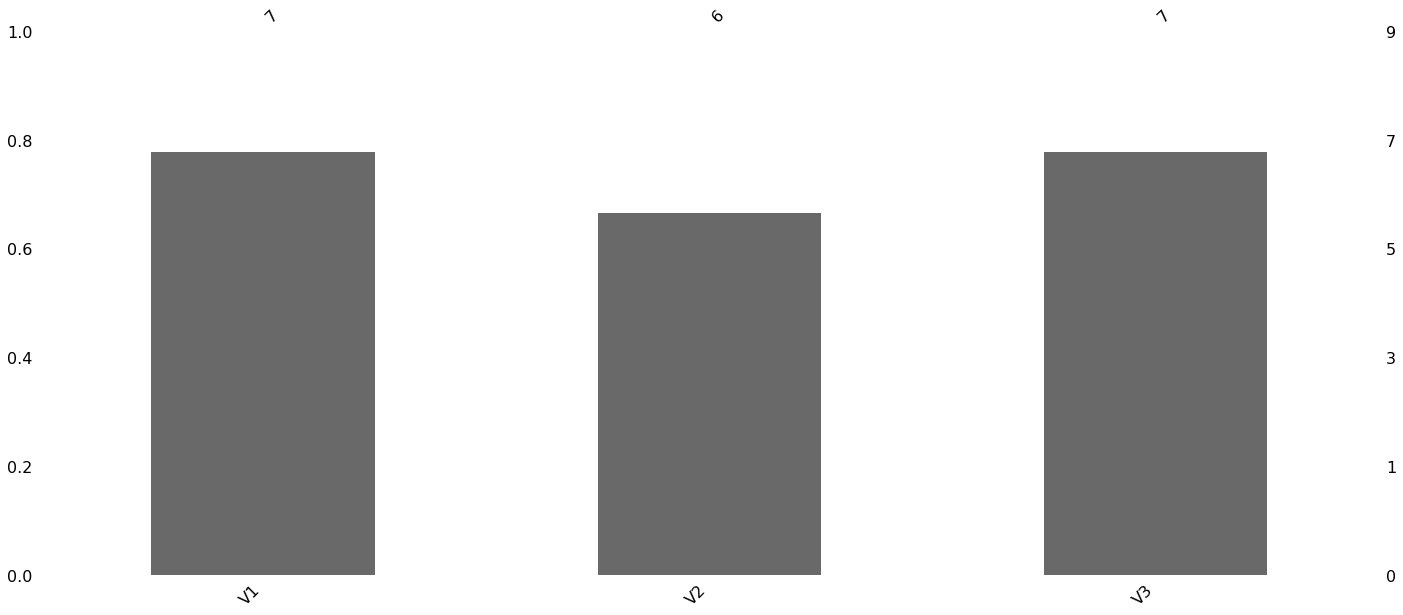

In [96]:
msno.bar(df);

In [97]:
import seaborn as sns

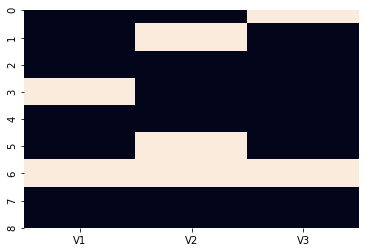

In [98]:
sns.heatmap(df.isnull(),cbar=False);

* Değişkenler ve gözlemler çok fazla büyüdüğünde grafiğe bakarak izleriz. 
    * Eğer iki değişken bir çok kez aynı anda boş ise, veya birisi boşken diğeri aynı anda dolu ise. Böyle bir durumda bu boş değer girişinin rastlantısal olarak değil de, bir ilişkiden kaynaklandığını düşünebilir. Ve gerekli analizleri yaparak bunu tespit etmeye çalışırı.

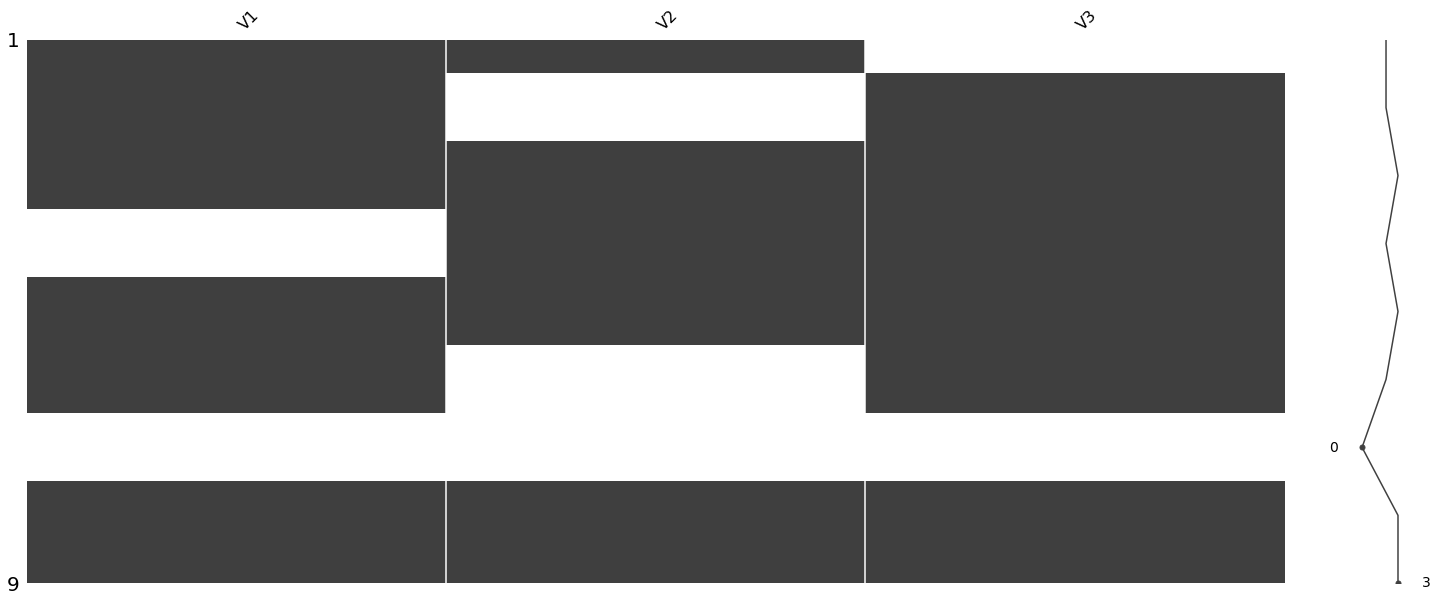

In [99]:
msno.matrix(df);

In [100]:
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


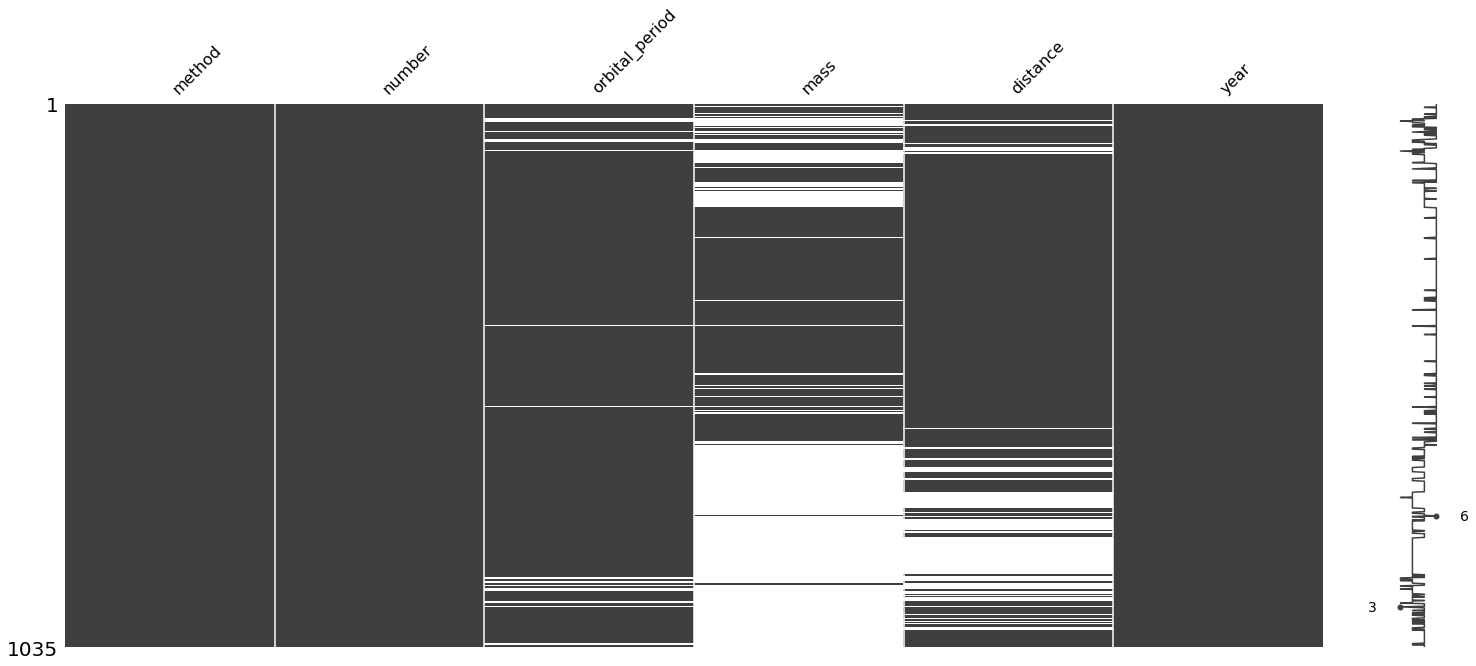

In [101]:
msno.matrix(df);

* Buraya bakınca az çok görüyoruz ki, en çok boş olan değerimi mass. 
* orbital_period ve distance değerleri neredeyse hiç tek başlarına boş değer almamışlar. Genelde hep mass boş olduğu zaman boş değer almışlar. 
    * Böyle bir şey gördüğümüzde msno(heatmap) kullanarak Korelasyon grafiği çizdririr ve boş değerlerin gerçekten korelasyonu olup olmadığına bakarız.

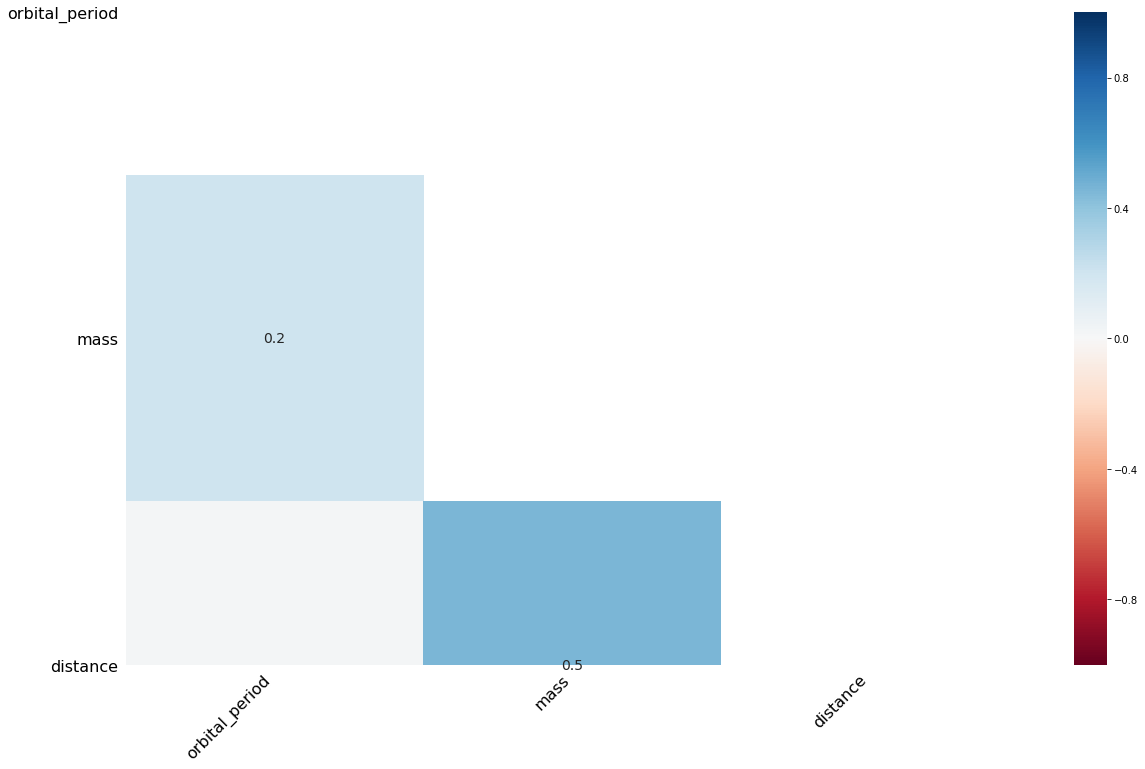

In [102]:
msno.heatmap(df);

* mass-distance arasında boş değer bazında, gerçekten de orta şiddetli 0.5'lik bir korelasyon varmış.
* Aynı şekilde mass-orbital_period arasında da 0.2 şiddetinde bir korelasyon var.
    * Bunlardan da anlıyoruz ki bu değerler arasında rastgele bir boş olma durumu yok. Aralarında bir ilişki durumu olma ihtimali çok yüksek. Yani incelemden boş değerlerin dropna() deseydik, çok büyük sorunlara neden olmuş olabilirdik.

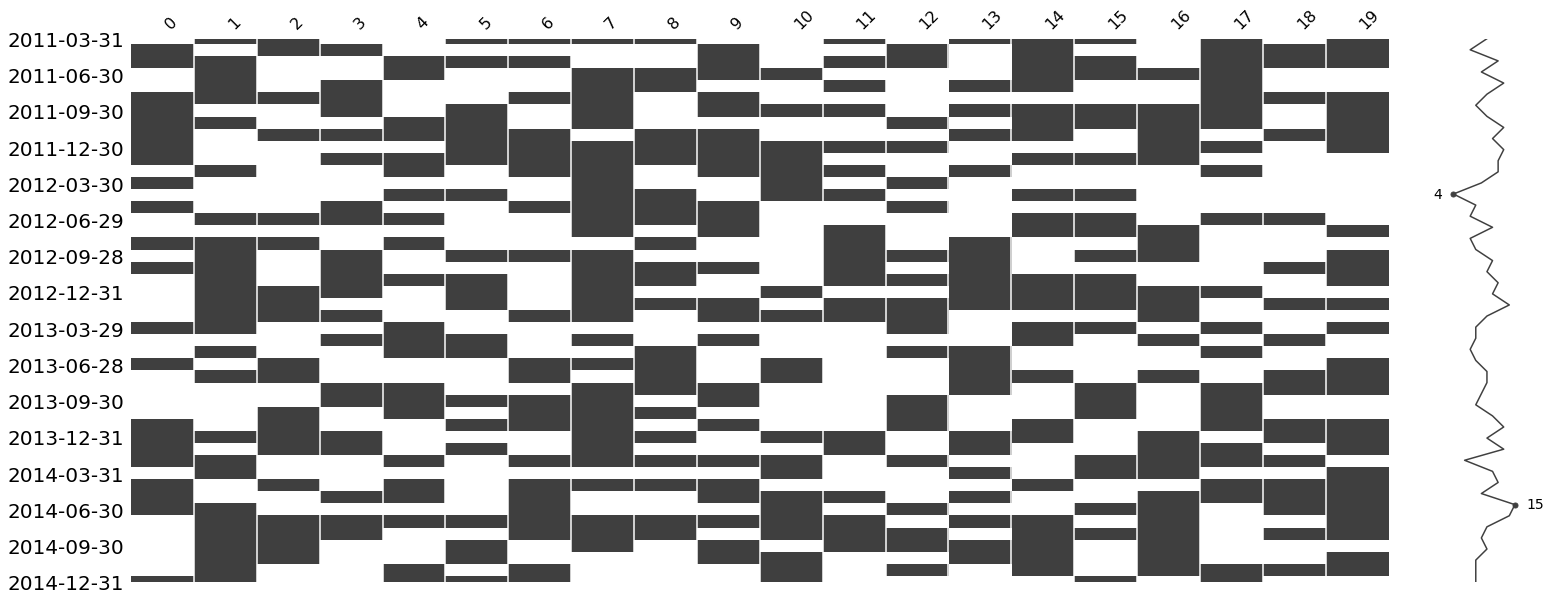

In [103]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

* Zaman serisi üzerinde nullity correlation analizi grafiği

### Silme Yöntemleri

In [104]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])



df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
# Tüm değerler NA ise, o gözlemi sil.
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [106]:
# en az 1 tane NA olan değişkenleri silmek
df.dropna(axis=1)
    # Hepsinde boş değer old. için hepsini sildi.

""
0
1
2
3
4
5
6
7
8


In [107]:
df.V1[[3,6]] = 99 # V1'deki boşlukları dolduruyoruz.

In [108]:
df.dropna(axis=1)

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [109]:
df.dropna(axis=1,how="all")
# tüm gözlemleri NA olan değişkenleri siler.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama Yöntemleri

* apply ile tüm eksik gözlemleri ortalama ile doldurmayı görmüştük. Bidaha görelim 

In [110]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,99.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,99.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


* Bunun bir başka yöntemi daha vardır. Bu yöntemle, istediğimiz gözlemleri istediğimiz değerlere direkt doldurabiliriz.

In [111]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,99.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,99.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


* Ya da ilk 2 değişkeni ortalama, diğerini de çarpık dağıldığı için median ile dolduralım

In [112]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,99.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


* <font color="orange"> Veya 3. bir yol olarak pandas ile bu işlemi gerçerkleştiririz.

In [113]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,99.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,99.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [114]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


* !! Eğer dolduracağımız değer, başka bir kategorik değişkene bağlı ise, rastgele bir değer ile doldururken çok dikkat etmeliyiz.
    * Mesela burada maaş değişkeni, departmana bağlı. IT departmanında çalışan birisinin boş maaş değerine, diğer departmanlardan da harmanlanmış olan ortalama bir maaş değeri atayamayız. Yalnızca kendi departmanının ortalama değerini bulup ona göre bir değer ataması yapmamız gerekmektedir.

In [115]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [116]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"),inplace=True)
df

,maas,V2,V3,departman
0,1.000000,7.0,NaN,IT
1,3.000000,NaN,12.0,IT
2,6.000000,5.0,5.0,IK
3,4.666667,8.0,6.0,IK
4,7.000000,12.0,14.0,IK
5,1.000000,NaN,7.0,IK
6,4.666667,NaN,NaN,IK
7,9.000000,2.0,2.0,IT
8,15.000000,3.0,31.0,IT


### Kategorik değişkenler ve Zaman serilerinde eksiklik Değer Ataması

In [117]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


* Farkındaysak burada kategorik değişkendeki NaN olması gereken ifade normal bir string gibi "nan" olark girilmiş. Python'da isnull yaptığımızda da bu değeri boş olarak göremeyiz. Peki bu değer nasıl doldulacak kısmında ise bu durum genel olarak farklı algoritmalar veya regresyonlar ile yapılır ama biz burada rastgele atama yapacağız.

In [118]:
df.groupby("departman")["departman"].count()
# gördüğümüz gibi boş değer olarak değil, string "nan" olarak algıladı.

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [119]:
df.departman.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: departman, dtype: bool

In [120]:
df.departman.loc[df.departman == "nan"] = "IK"

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [121]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [122]:
df.departman[1] = df.V3[0]
df

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


* Bu sefer gerçekten bir NaN ifadesi var. Bunu yok etmek için fillna ile en çok tekrar eden değeri koyacağız

In [123]:
df.groupby("departman")["departman"].count()

departman
IK    5
IT    3
Name: departman, dtype: int64

In [124]:
df.departman.isnull()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: departman, dtype: bool

In [125]:
df.departman.fillna(df.departman[5]) # rastgele bir değer ile doldurduk.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

#### Zaman Serilerinde Atama İşlemleri

* Zaman serilerinde: Örneğin bir günlük dolar kuru veri setinde günlük kapanış olarak girilen bir dolar datası var. Ama boş değerler de girilmiş. Böyle bir durumda, mantıken dolar değeri bir gün 6.50 iken diğer gün 6.30-6.70 civar iki eskik iki fazla seyretmesi lazım. Bu nedenle de eksik değer yerine kednisinden bir sonraki değeri veya bir önceki değeri girerek doldurma işlemi gerçekleştiririz.

In [126]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [127]:
df.maas.interpolate() # kendisinden bir önceki ve bir sonrakinin ortalaması ile doldurduk.

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [128]:
df.maas.fillna(method="bfill") # kendisinden bir sonraki değer ile doldurduk.

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

### Eksik Gözlemleri Tahmine Dayalı Değer Atama Yöntemleri
* Değer atarken bizim ortalama değerler, medyanlar vs. atarak doldurmamızdansa, makine öğrenme algoritmalarının otomatik olarak kullanıldığı KNN gibi algoritmaların kullanıldığı otomatik değer atama yöntemleri ve kütüphaneleri kullanmak çok daha mantıklıdır.
    * Ama tabiki de kredi kartı öğreniğindeki gibi ilişkisel kısımlara yine de dikkat etmeli ve sorgulamalıyız.

In [129]:
planets = sns.load_dataset("planets")
df = planets.copy()
df = df.select_dtypes(include=["float64","int64"])

In [130]:
    df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [131]:
from fancyimpute import KNN

Using TensorFlow backend.


ModuleNotFoundError: No module named 'google'

In [ ]:
#!pip install fancyimpute

In [ ]:
var_names = list(df)

### KNN

In [ ]:
knn_imp = KNN(k=5).fit_transform(df)

In [ ]:
from ycimpute.imputer import iterforest

In [ ]:
var_names = list(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

### Random Forest ile Atama

In [ ]:
!pip install ycimpute

In [ ]:
from ycimpute import impute

## Veri Standardiyazyonu ve Değişken Dönüşümü

### Standartlaştırma

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float) # astype ile veri tipi müdahalesi
df

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df)

### Normalizasyon
* Bir değişkenin değerini 0-1 arasında dönüştürmek

In [ ]:
preprocessing.normalize(df)

### Min-Max Dönüşümü
* Belirli aralıkta, veri seti değerlerini o aralığa göre değerlere dönüştürür.

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [ ]:
scaler.fit_transform(df) # 10-20 arasında bir dönüştürme işlemi gerçekleştirildi.

* Buraya kadarki dönüşümlerde değişkenlerin varyans yapıları korundu, ölçekleri değişti. Yani sayılar küçüldü veya büyüdü ama, ilk veri setindeki büyüklük ve küçüklüklerini yine de korudular.

## Binarize Dönüşüm

In [ ]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

* Eşik değer 5 olarak belirlendi. Bu sayede 5'den küçük olanlar 0, büyük olanlar 1 olarak döndüler.

In [ ]:
binarizer.transform(df)

## 0-1 Dönüşümü

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [ ]:
df_l.head()

In [ ]:
df_l["yeni_sex"] = df_l["sex"].cat.codes

In [ ]:
df_l.head()

* <font color="orange"> cat.codes kullanırsak, ilk gördüğü değişkeni 1 olarak kabul eder diğerini 0. </font>
    * Mesela burada ilk önce Female'yi gördüğü için 1 olarak aldı, Male'yi 0

In [ ]:
lbe = preprocessing.LabelEncoder()

In [ ]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [ ]:
df_l.head()

* <font color="orange"> preprocessing kullanırsak da, ilk gördüğünü 0, diğerini 1 olarak kabul eder </font>
    * Makine öğrenmesi eğitim yaparken bu duruma dikkat ederek istediğimiz fonksiyonu kullanırız.

## "1 ve Diğerleri (0) " Dönüşümü
* Çok sık tekrar eden değişkenlere 1, diğerlerine de 0 veririz. 
* Mesela bir iş yerinde çalışanlar genel olarak İstanbul'dansa. Burada İstanbul için 1, diğerleri için de 0 veririz.

In [ ]:
df.head()

In [ ]:
df_l.head()

In [ ]:
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0)

* sun --> 1 olsun, diğerleri de 0 diyoruz.

In [ ]:
df_l.head(20)

## Çok Sınıflı Dönüşüm

In [ ]:
lbe = preprocessing.LabelEncoder()

In [ ]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [ ]:
df_l

* <font color = "orange"> <b> <u> Kategorik değişkenler bu şekilde dönüştürülürken Nominal veye Ordinal olup olmadıklarına çok dikkat etmek lazım . 
    * Eğer Ordinal ise (Kadın-Erkek,Eğitim seviyesi) bu tarz bir dönüşüm yapmak çok karlı olabilir.
    * Ama eğer bu örnekteki gibi nominal bir durum varsa, değişkenler arasında bir ilişki olmadığı halde onları 0-3 arası değerlere hapsetmiş olduk ve bu da makine öğrenmesi aşamasında çok gereksiz sıkıntılar yaşatabilmekte. </font>

## One-Hot Dönüşümü ve Dummy Değişken Tuzayı
* GE-REK-SİZ

In [ ]:
df_one_hot = df.copy()

In [ ]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

## Sürekli Değişkeni Kategorik Değişkene Çevirme

In [ ]:
df.head()

In [ ]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [ ]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [ ]:
est.transform(dff)[0:10]

## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [ ]:
df.head()

In [ ]:
df["yeni_degisken"]  = df.index

In [ ]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [ ]:
df.head()

In [ ]:
df.index = df["yeni_degisken"]

In [ ]:
df.index